In [72]:
import pandas as pd
from math import sqrt
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import preprocessing
import numpy as np  



In [73]:
data = pd.read_csv('./Data/ozone (1).csv')
y = data["MaxO3"]
data = data[["T9","T12","T15","Ne9","Ne12","Ne15","Vx9","Vx12","Vx15","MaxO3v"]]
# permet d'avoir des stats
data.describe()

T9         T12         T15         Ne9        Ne12        Ne15  \
count  112.000000  112.000000  112.000000  112.000000  112.000000  112.000000   
mean    18.360714   21.526786   22.627679    4.928571    5.017857    4.830357   
std      3.122726    4.042321    4.530859    2.594916    2.281860    2.332259   
min     11.300000   14.000000   14.900000    0.000000    0.000000    0.000000   
25%     16.200000   18.600000   19.275000    3.000000    4.000000    3.000000   
50%     17.800000   20.550000   22.050000    6.000000    5.000000    5.000000   
75%     19.925000   23.550000   25.400000    7.000000    7.000000    7.000000   
max     27.000000   33.500000   35.500000    8.000000    8.000000    8.000000   

              Vx9        Vx12        Vx15      MaxO3v  
count  112.000000  112.000000  112.000000  112.000000  
mean    -1.214346   -1.611004   -1.690683   90.571429  
std      2.632742    2.795673    2.810198   28.276853  
min     -7.878500   -7.878500   -9.000000   42.000000  
25%     -3.276450   -3.564700   -3.939200   71.000000  
50%     -0.866000   -1.879400   -1.549650   82.500000  
75%      0.694600    0.000000    0.000000  106.000000  
max      5.196200    6.577800    5.000000  166.000000

In [74]:
# important de normaliser pour pouvoir ensuite entrainer son algo
def normalization(dataToNormalize):
    columns = dataToNormalize.columns
    for col in columns:
        x = dataToNormalize[[col]].values.astype(float)
        standard_normalization = preprocessing.StandardScaler()
        res = standard_normalization.fit_transform(x)
        dataToNormalize[col] = res

normalization(data)
data.describe()


T9           T12           T15           Ne9          Ne12  \
count  1.120000e+02  1.120000e+02  1.120000e+02  1.120000e+02  1.120000e+02   
mean  -5.947623e-16 -2.299748e-16 -1.586033e-17 -1.110223e-16 -1.744636e-16   
std    1.004494e+00  1.004494e+00  1.004494e+00  1.004494e+00  1.004494e+00   
min   -2.271236e+00 -1.870365e+00 -1.713231e+00 -1.907854e+00 -2.208904e+00   
25%   -6.950420e-01 -7.272901e-01 -7.432910e-01 -7.465517e-01 -4.480695e-01   
50%   -1.803663e-01 -2.427259e-01 -1.280717e-01  4.147509e-01 -7.860868e-03   
75%    5.031874e-01  5.027576e-01  6.146254e-01  8.018518e-01  8.725563e-01   
max    2.779019e+00  2.975278e+00  2.853802e+00  1.188953e+00  1.312765e+00   

               Ne15           Vx9          Vx12          Vx15        MaxO3v  
count  1.120000e+02  1.120000e+02  1.120000e+02  1.120000e+02  1.120000e+02  
mean  -1.586033e-16  3.172066e-17  1.586033e-17 -9.516197e-17  7.533656e-17  
std    1.004494e+00  1.004494e+00  1.004494e+00  1.004494e+00  1.004494e+00  
min   -2.080415e+00 -2.542636e+00 -2.251932e+00 -2.612687e+00 -1.725430e+00  
25%   -7.883274e-01 -7.867737e-01 -7.019695e-01 -8.037238e-01 -6.952468e-01  
50%    7.306449e-02  1.329075e-01 -9.643571e-02  5.041172e-02 -2.867259e-01  
75%    9.344564e-01  7.283376e-01  5.788388e-01  6.043282e-01  5.480777e-01  
max    1.365152e+00  2.445874e+00  2.942264e+00  2.391559e+00  2.679491e+00

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(data,y,test_size=0.2) # sépare les données et 20% des données qui deviennent des données test
regression_alg = LinearRegression() # instanciation de l'algo
regression_alg.fit(x_train,y_train) # explication comment arriver de x à y

In [76]:
train_prediction = regression_alg.predict(x_train)
print(f"RMSE = {round(sqrt(mean_squared_error(y_train,train_prediction)),2)}")
print(f"R2 score = {round(r2_score(y_train,train_prediction),2)}")


RMSE = 14.01
R2 score = 0.77


In [77]:
test_prediction = regression_alg.predict(x_test)
print(f"RMSE = {round(sqrt(mean_squared_error(y_test,test_prediction)),2)}")
print(f"R2 score = {round(r2_score(y_test,test_prediction),2)}")

RMSE = 13.44
R2 score = 0.65


In [79]:
regression_alg.coef_

array([-1.060779  ,  9.45876557,  3.79195559, -3.26877136,  0.20823312,
       -1.48030047,  2.23868187,  2.41672418,  0.48883182, 10.13643915])

In [80]:
regression_alg.intercept_

90.53411325933043

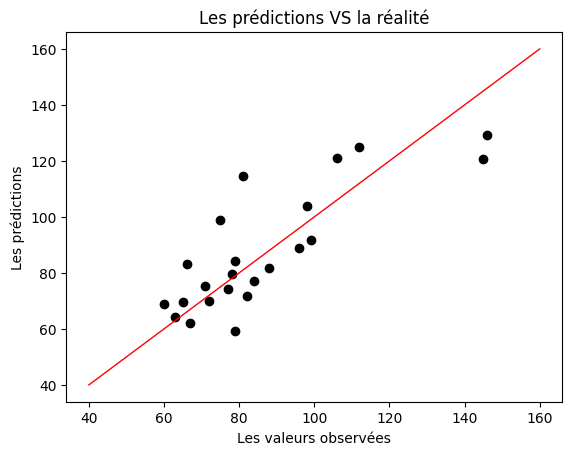

In [84]:
plt.scatter(y_test,test_prediction,color='black')
plt.title("Les prédictions VS la réalité")
plt.xlabel("Les valeurs observées")
plt.ylabel("Les prédictions")
plt.plot([40.0,160.0],[40.0,160.0], 'red', lw=1)
plt.show()

In [90]:
def average_result(nb_run):
    average_rmse = 0
    average_r2 = 0
    for i_run in range(nb_run):
        x_train, x_test, y_train, y_test = train_test_split(data, y, test_size=0.2)

        regression_alg = LinearRegression()
        regression_alg.fit(x_train, y_train)

        test_predictions = regression_alg.predict(x_test)

        i_run_rmse = sqrt(mean_squared_error(y_test, test_predictions))
        i_run_r2 = r2_score(y_test, test_predictions)

        print(f"Run {i_run} : RMSE = {round(i_run_rmse,2)} - R2_score = {round(i_run_r2,2)}")

        average_rmse = average_rmse + i_run_rmse
        average_r2 = average_r2 + i_run_r2

    average_rmse = average_rmse / nb_run
    average_r2 = average_r2 / nb_run

    print(f"Moyenne : RMSE = {round(average_rmse,2)} - R2_score = {round(average_r2,2)}")

average_result(10)

Run 0 : RMSE = 15.29 - R2_score = 0.73
Run 1 : RMSE = 15.86 - R2_score = 0.65
Run 2 : RMSE = 13.18 - R2_score = 0.77
Run 3 : RMSE = 15.54 - R2_score = 0.72
Run 4 : RMSE = 17.57 - R2_score = 0.66
Run 5 : RMSE = 17.43 - R2_score = 0.6
Run 6 : RMSE = 14.99 - R2_score = 0.62
Run 7 : RMSE = 10.72 - R2_score = 0.76
Run 8 : RMSE = 17.23 - R2_score = 0.58
Run 9 : RMSE = 17.94 - R2_score = 0.69
Moyenne : RMSE = 15.58 - R2_score = 0.68


Comme les échantillons sont faits au hasard, il va falloir faire une cross-validation
KFOLD permet de séparer un dataset en plusieurs paque de données
On va prendre un paquet de donnée comme paquet de test puis les autres comme paquet de donnée d'entrainement et on alterne.

In [97]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=2, shuffle=False)

In [98]:
for train_index, test_index in kf.split(data):
    print("les indices de train_index = ", train_index)
    print("Les indices de test_index", test_index)
    print("\n\n")


les indices de train_index =  [ 56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73
  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91
  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108 109
 110 111]
Les indices de test_index [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55]



les indices de train_index =  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55]
Les indices de test_index [ 56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73
  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91
  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108 109
 110 111]





In [100]:
kf = KFold(n_splits=3, shuffle=False)
for train_index, test_index in kf.split(data):
    print("le nombre d'élément de train_index = ", train_index.shape[0])
    print("le nombre d'élément de test_index", test_index.shape[0])



le nombre d'élément de train_index =  74
le nombre d'élément de test_index 38
le nombre d'élément de train_index =  75
le nombre d'élément de test_index 37
le nombre d'élément de train_index =  75
le nombre d'élément de test_index 37


In [101]:
def create_evaluate_model(index_fold,x_train,x_test,y_train,y_test):
    regression_alg = LinearRegression()
    regression_alg.fit(x_train, y_train)

    test_predictions = regression_alg.predict(x_test)

    rmse = sqrt(mean_squared_error(y_test, test_predictions))
    r2 = r2_score(y_test, test_predictions)

    print(f"Run {index_fold}RMSE = {round(rmse,2)} - R2_score = {round(r2,2)}")
    return rmse, r2


In [102]:
nb_model = 5
kf = KFold(n_splits=nb_model, shuffle=False)
index_fold = 0
average_rmse = 0
average_r2 = 0
for train_index, test_index in kf.split(data):
    x_train, x_test = data.iloc[train_index], data.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]
    current_rmse, current_r2 = create_evaluate_model(index_fold, x_train, x_test, y_train, y_test)
    average_rmse = average_rmse + current_rmse
    average_r2 = average_r2 + current_r2
    index_fold = index_fold + 1

average_rmse = average_rmse / nb_model
average_r2 = average_r2 / nb_model
print(f"Moyenne : RMSE = {round(average_rmse,2)} - R2_score = {round(average_r2,2)}")

Run 0RMSE = 15.25 - R2_score = 0.55
Run 1RMSE = 18.13 - R2_score = 0.2
Run 2RMSE = 19.2 - R2_score = 0.74
Run 3RMSE = 16.31 - R2_score = 0.68
Run 4RMSE = 8.4 - R2_score = 0.62
Moyenne : RMSE = 15.46 - R2_score = 0.56
